In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import string

In [3]:
data = pd.read_csv('Myntra Kurtis.csv')
data

,Brand Name,Product URL,Image,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)
3,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF)
4,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,157,Ethnic Motifs Printed Kurti,449.0,1499.0,(70% OFF)
...,...,...,...,...,...,...,...,...,...
594,FAWOMENT,https://www.myntra.com/kurtis/fawoment/fawomen...,NaN,NaN,0,Floral Embroidered Kurti,911.0,3037.0,(70% OFF)
595,Fabindia,https://www.myntra.com/kurtis/fabindia/fabindi...,NaN,NaN,0,Yoke Design Kurti,1959.0,2799.0,(30% OFF)
596,all about you,https://www.myntra.com/kurtis/all-about-you/al...,NaN,NaN,0,Yoke Design A-Line Kurti,759.0,1899.0,(60% OFF)
597,MALHAAR,https://www.myntra.com/kurtis/malhaar/malhaar-...,NaN,4.8,6,Pure Cotton Kurti,574.0,2299.0,(75% OFF)


In [4]:
print(data.isnull().sum())

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64


In [5]:
data = data.drop('Image',axis=1)

In [6]:
data = data.dropna()

In [9]:
print(data.shape)

(364, 8)


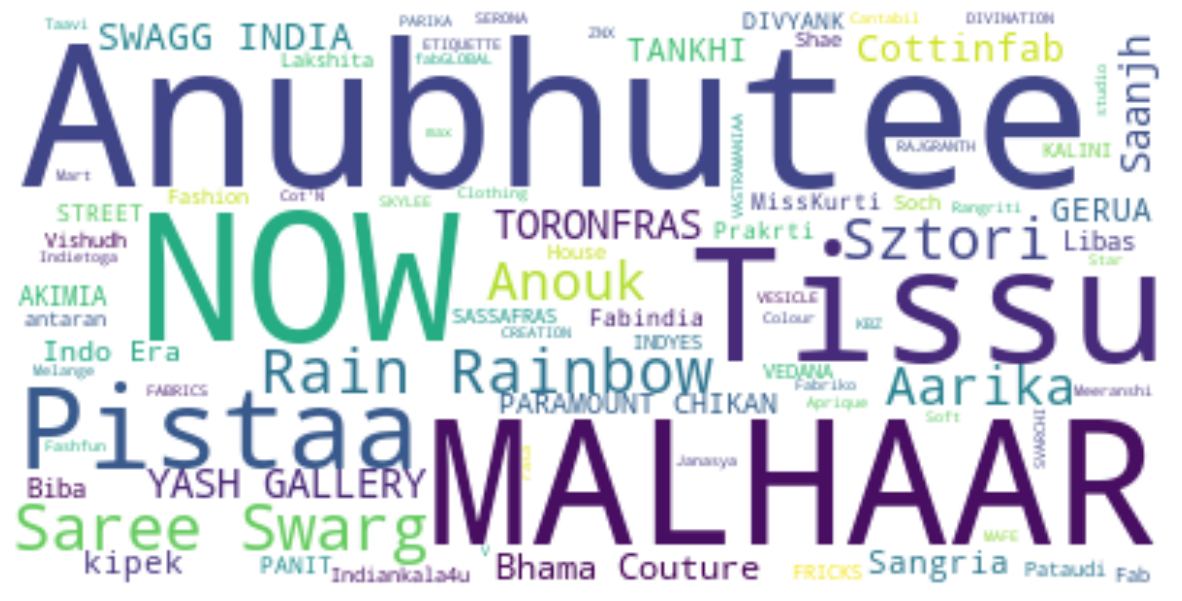

In [10]:
text = ' '.join(i for i in data['Brand Name'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
highest_rated = data.sort_values(by=['Product Ratings'],
                                 ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated[['Product Info','Product Ratings','Brand Name']])

                        Product Info  Product Ratings        Brand Name
435            Mandarin Collar Kurti              5.0            INDYES
249      Floral Printed Kaftan Kurta              5.0           Sangria
448          Solid Pure Cotton Kurti              5.0           MALHAAR
308             Floral Printed Kurti              5.0           MALHAAR
538                Pure Cotton Kurti              5.0           MALHAAR
277    Women Solid Embellished Kurti              5.0          Fabindia
515     Chikankari Embroidered Kurti              5.0  PARAMOUNT CHIKAN
62       Ethnic Motifs Printed Kurti              4.9              Biba
80   Ethnic Motifs Embroidered Kurti              4.8           Sangria
450      Self Striped Straight Kurti              4.8            Saanjh


In [17]:
# calculate weighted score to recommend trending fashion
#(mr): the mean rating of all the products
#(m): minimum number of ratings
#(n): total number of ratings of the product
#(a): average rating of the product
mr = data['Product Ratings'].mean()
m = data['Number of ratings'].quantile(0.9)
n = data['Number of ratings']
a =  data['Product Ratings']

In [20]:
data['Score'] = (n/(n+m) *a) + (m/(m+n) * mr)

recommendations = data.sort_values('Score', ascending=False)
print(recommendations[['Brand Name','Product Info','Product Ratings','Score','Selling Price','Discount']].head(10))
                        

         Brand Name                                       Product Info  \
48            Tissu                    Women Floral Print A-Line Kurti   
11        Anubhutee                        Ethnic Motifs Printed Kurti   
155       Anubhutee                                Women Printed Kurti   
66     YASH GALLERY                               Printed A-Line Kurti   
27        Anubhutee                       Women Printed Straight Kurti   
102          AKIMIA                      Embroidered Pure Cotton Kurti   
88            Tissu                Women Floral Printed Straight Kurti   
3         Anubhutee                        Ethnic Motifs Printed Kurti   
42   Rain & Rainbow  Women Printed Pure Cotton Pure Cotton A-Line K...   
18            GERUA                        Ethnic Motifs Printed Kurti   

     Product Ratings     Score  Selling Price   Discount  
48               4.4  4.338320          549.0  (45% OFF)  
11               4.4  4.300868          521.0  (70% OFF)  
155     